In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,Normalizer,RobustScaler
from sklearn import preprocessing
import matplotlib.pylab as plt

In [2]:
data = pd.read_csv('preprocessed_data.csv')
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92359 entries, 0 to 92358
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   payment_type                92359 non-null  object 
 1   payment_installments        92359 non-null  int64  
 2   payment_value               92359 non-null  float64
 3   customer_state              92359 non-null  object 
 4   order_item_id               92359 non-null  int64  
 5   price                       92359 non-null  float64
 6   freight_value               92359 non-null  float64
 7   product_name_lenght         92359 non-null  float64
 8   product_description_lenght  92359 non-null  float64
 9   product_photos_qty          92359 non-null  float64
 10  product_weight_g            92359 non-null  float64
 11  seller_state                92359 non-null  object 
 12  delivery_days               92359 non-null  int64  
 13  estimated_days              923

In [3]:
data.columns

Index(['payment_type', 'payment_installments', 'payment_value',
       'customer_state', 'order_item_id', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'seller_state',
       'delivery_days', 'estimated_days', 'ships_in', 'review_time',
       'arrival_time', 'delivery_impression', 'estimated_del_impression',
       'ship_impression', 'seller_popularity', 'existing_customer', 'distance',
       'Score', 'freight_ratio', 'size'],
      dtype='object')

**Separating Numerical Variables**

In [4]:
data_n = data[['payment_value', 'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'delivery_days', 'estimated_days', 'ships_in', 'seller_popularity', 'distance', 'freight_ratio', 'size','Score']]
data_n.head()

,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,delivery_days,estimated_days,ships_in,seller_popularity,distance,freight_ratio,size,Score
0,18.12,29.99,8.72,40.0,268.0,4.0,500.0,8,16,4,58,18.05,0.225265,1976.0,1.0
1,2.00,29.99,8.72,40.0,268.0,4.0,500.0,8,16,4,58,18.05,0.225265,1976.0,1.0
2,18.59,29.99,8.72,40.0,268.0,4.0,500.0,8,16,4,58,18.05,0.225265,1976.0,1.0
3,141.46,118.70,22.76,29.0,178.0,1.0,400.0,14,20,6,125,852.26,0.160894,4693.0,1.0
4,179.12,159.90,19.22,46.0,232.0,1.0,420.0,9,27,5,1169,511.82,0.107302,9576.0,1.0


In [5]:
data_n.describe()

,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,delivery_days,estimated_days,ships_in,seller_popularity,distance,freight_ratio,size,Score
count,92359.000000,92359.000000,92359.000000,92359.000000,92359.000000,92359.000000,92359.000000,92359.000000,92359.000000,92359.000000,92359.000000,92359.000000,92359.000000,92359.000000,92359.000000
mean,166.293661,116.901274,18.357207,48.756656,778.657435,2.191449,2075.443952,11.229756,23.409857,6.606654,439.551955,449.521201,0.206623,15263.998820,0.842971
std,264.975572,177.518609,13.556086,10.059216,647.313499,1.712527,3711.224273,7.675558,8.142131,3.082636,581.408230,370.560170,0.124978,23233.014217,0.363830
min,0.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000,168.000000,0.000000
25%,58.640000,39.900000,12.700000,42.000000,341.000000,1.000000,300.000000,6.000000,18.000000,5.000000,58.000000,142.400000,0.115834,2856.000000,1.000000
50%,105.280000,71.000000,15.660000,52.000000,596.000000,1.000000,700.000000,9.000000,23.000000,6.000000,175.000000,377.500000,0.182077,6624.000000,1.000000
75%,184.010000,129.970000,19.290000,57.000000,971.000000,3.000000,1800.000000,14.000000,28.000000,7.000000,552.000000,645.135000,0.271727,18400.000000,1.000000
max,13664.080000,6499.000000,375.280000,72.000000,3992.000000,20.000000,40425.000000,60.000000,60.000000,51.000000,2086.000000,8711.000000,0.963283,296208.000000,1.000000


In [22]:
pcs = PCA()
pcs.fit(preprocessing.scale(data_n.iloc[:,:]))
pcsSummary = pd.DataFrame({'Standard deviation' : np.sqrt(pcs.explained_variance_), 
                          'Proportion of variance' : pcs.explained_variance_ratio_ ,
                          'Cummulative proportion' : np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary.columns)+1)]
pcsSummary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Standard deviation,1.779,1.4311,1.2077,1.1262,1.0931,1.0235,0.9881,0.9186,0.8423,0.8151,0.7191,0.6315,0.5490,0.4651,0.4365
Proportion of variance,0.211,0.1365,0.0972,0.0846,0.0797,0.0698,0.0651,0.0563,0.0473,0.0443,0.0345,0.0266,0.0201,0.0144,0.0127
Cummulative proportion,0.211,0.3475,0.4448,0.5293,0.6090,0.6788,0.7439,0.8001,0.8474,0.8917,0.9262,0.9528,0.9729,0.9873,1.0000


In [23]:
pcsComponents = pd.DataFrame(pcs.components_.transpose(), columns = pcsSummary.columns, index = data_n.iloc[:,:].columns)
pcsComponents.iloc[:,:]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
payment_value,0.369358,0.183705,0.330679,0.071628,-0.133987,-0.075264,0.231593,0.068641,0.236264,0.354971,0.105510,-0.145285,0.499762,0.410301,-0.034782
price,0.399535,0.232933,0.334818,0.057221,-0.072429,0.009341,0.206501,0.084169,0.119805,0.116749,0.128156,-0.010613,-0.356613,-0.664119,0.054124
freight_value,0.449665,-0.077856,-0.229640,-0.000498,0.229668,-0.073753,0.110253,-0.029546,0.028389,0.136016,0.004583,0.168470,-0.610358,0.474664,-0.149119
product_name_lenght,0.023792,0.053563,0.008465,-0.680030,0.044613,0.108102,0.037279,-0.427014,0.534463,-0.216887,0.059537,-0.016097,0.010573,-0.003181,-0.005410
product_description_lenght,0.113675,0.145487,0.330499,-0.086906,0.360108,0.007982,-0.442379,-0.507536,-0.428767,0.277629,-0.025442,-0.044673,0.040506,-0.018868,-0.023186
product_photos_qty,0.022611,0.121001,0.078868,-0.433057,0.327570,0.044553,-0.369261,0.731429,0.042327,0.086512,0.011095,0.016991,0.024455,0.012512,-0.004234
product_weight_g,0.437381,0.083178,-0.393222,-0.009816,-0.009355,-0.009014,-0.131070,-0.030578,-0.092278,-0.130201,-0.044484,-0.051138,0.178311,-0.032268,0.752249
delivery_days,0.161744,-0.454565,0.162410,-0.122052,-0.144585,-0.212631,-0.111504,0.037639,-0.218707,-0.268202,0.711263,-0.134387,0.001847,0.042152,-0.021677
estimated_days,0.173689,-0.491334,0.165778,0.011841,0.044784,0.320979,0.000505,0.053364,0.036742,-0.048552,-0.414742,-0.640142,-0.085955,-0.002642,-0.004866
ships_in,0.127345,-0.260184,0.051714,0.156477,-0.362612,0.498536,-0.466450,-0.025277,0.245257,0.191430,0.053339,0.437055,0.004661,0.001766,-0.001980


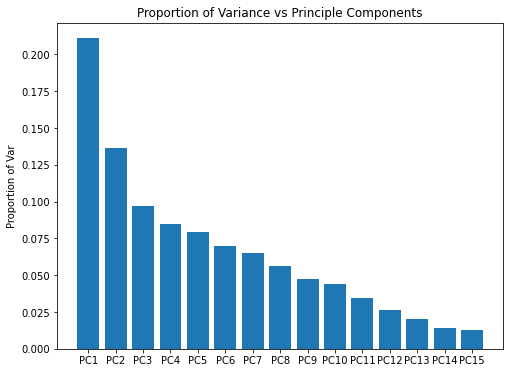

In [24]:
#Vizualiuzing the proportion of variance for corresponding principle components
pcsSummary.iloc[1]
plt.figure(figsize=(8,6))
plt.bar(pcsSummary.columns, height = pcsSummary.iloc[1])
plt.title('Proportion of Variance vs Principle Components')
plt.ylabel('Proportion of Var')
plt.show()

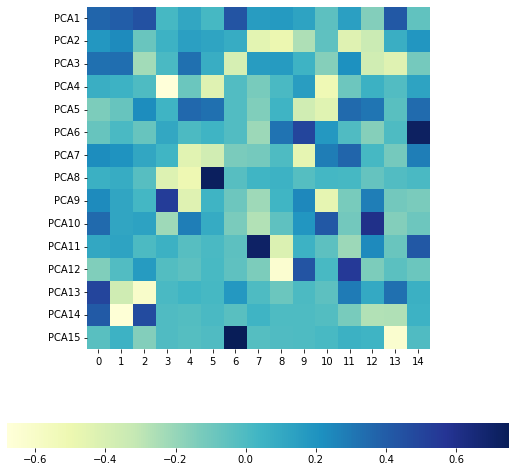

In [25]:
fig = plt.figure(figsize = (9,9))
ax = sns.heatmap(pcs.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcs.n_components_+1)],
                 xticklabels=list(x.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

**PCA Biplot**

In [28]:
x = pd.DataFrame(StandardScaler().fit_transform(data_n))
pc = pcs.fit_transform(x)

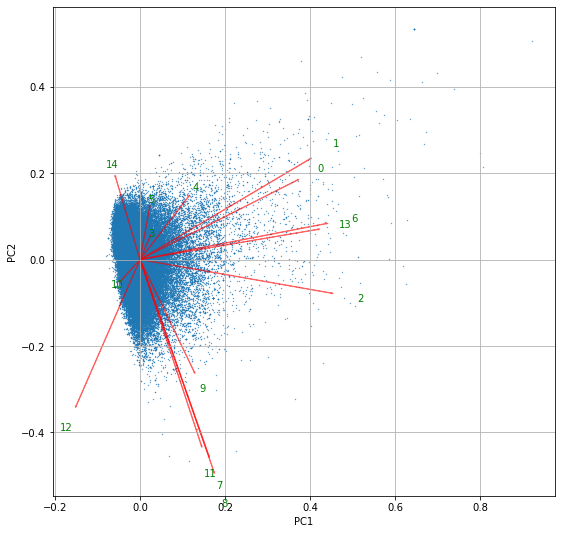

In [29]:
fig = plt.figure(figsize = (9,9))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=0.1)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pc[:,0:2],np.transpose(pcs.components_[0:2, :]),list(x.columns))
plt.show()

**Understanding Customer Satisfaction**

In [57]:
from sklearn.preprocessing import StandardScaler

#Scale the data
x = pd.DataFrame(StandardScaler().fit_transform(data_n))
y = pd.DataFrame(data_n.Score)

pca = PCA(n_components=2)
pc = pca.fit_transform(x)

ndf = pd.DataFrame(data = pc, columns = ['PC1', 'PC2'])
ndf.head()

,PC1,PC2
0,-1.752183,1.155004
1,-1.774645,1.143853
2,-1.751528,1.155329
3,-0.267753,-0.574822
4,-0.248657,0.051868


In [58]:
ndf = pd.concat([ndf, data_n[['Score']]], axis = 1)
ndf.head()

,PC1,PC2,Score
0,-1.752183,1.155004,1.0
1,-1.774645,1.143853,1.0
2,-1.751528,1.155329,1.0
3,-0.267753,-0.574822,1.0
4,-0.248657,0.051868,1.0


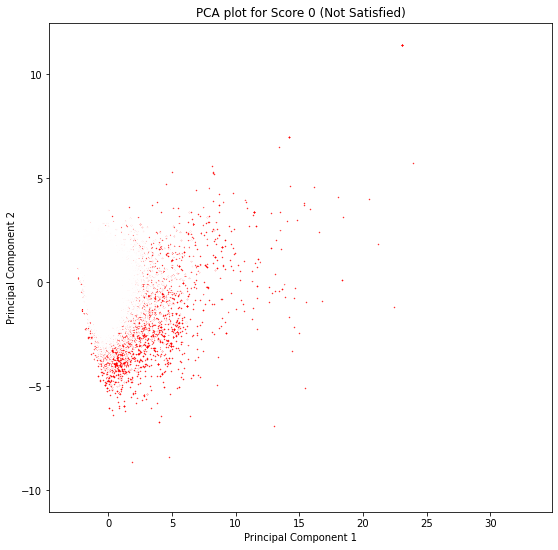

In [59]:
#Plotting Scatter plot
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA plot for Score 0 (Not Satisfied)')

Score = [0.0, 1.0]
colors = ['r', 'w']
for Score, color in zip(Score,colors):
    index = ndf['Score'] == Score
    ax.scatter(ndf.loc[index, 'PC1'], ndf.loc[index, 'PC2'], c = color, s = 0.2)

plt.show()

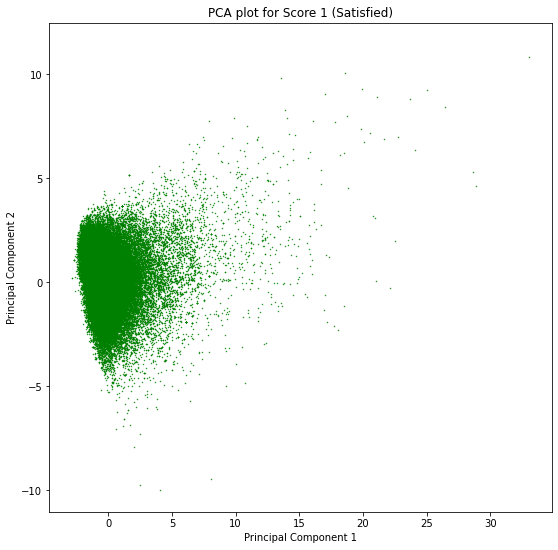

In [60]:
#Plotting Scatter plot
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA plot for Score 1 (Satisfied)')

Score = [0.0, 1.0]
colors = ['w', 'g']
for Score, color in zip(Score,colors):
    index = ndf['Score'] == Score
    ax.scatter(ndf.loc[index, 'PC1'], ndf.loc[index, 'PC2'], c = color, s = 0.2)

plt.show()

**Understanding Delivery Impression wrt Principle Components**

In [61]:
#Scale the data
x = pd.DataFrame(StandardScaler().fit_transform(data_n))
y = pd.DataFrame(data.delivery_impression)

pca = PCA(n_components=2)
pc = pca.fit_transform(x)

ndf = pd.DataFrame(data = pc, columns = ['PC1', 'PC2'])
ndf.head()

,PC1,PC2
0,-1.752112,1.154905
1,-1.774588,1.143758
2,-1.751457,1.155230
3,-0.268046,-0.574636
4,-0.248785,0.051887


In [62]:
ndf = pd.concat([ndf, y], axis = 1)
ndf.head()

,PC1,PC2,delivery_impression
0,-1.752112,1.154905,2
1,-1.774588,1.143758,2
2,-1.751457,1.155230,2
3,-0.268046,-0.574636,2
4,-0.248785,0.051887,2


In [63]:
y.value_counts()

delivery_impression
2                      73608
1                      13287
0                       5464
dtype: int64

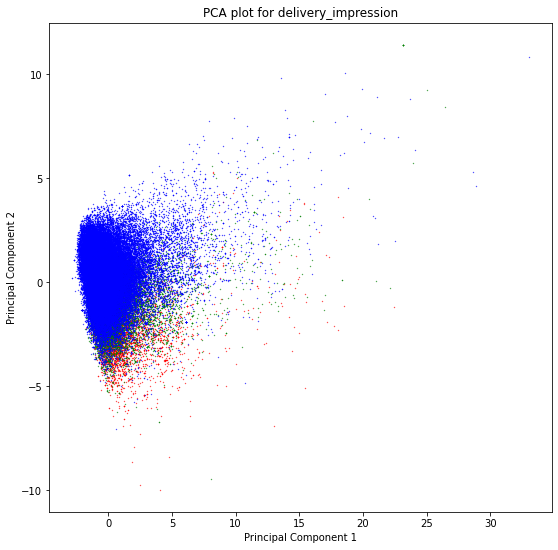

In [64]:
#Plotting Scatter plot
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA plot for delivery_impression')

delivery_impression = [0,1,2]
colors = ['r','g','b']
for delivery_impression, color in zip(delivery_impression,colors):
    index = ndf['delivery_impression'] == delivery_impression
    ax.scatter(ndf.loc[index, 'PC1'], ndf.loc[index, 'PC2'], c = color, s = 0.1)

plt.show()

**Understanding Existing Customers wrt Principle Components**

In [65]:
#Scale the data
x = pd.DataFrame(StandardScaler().fit_transform(data_n))
y = pd.DataFrame(data.existing_customer)

pca = PCA(n_components=2)
pc = pca.fit_transform(x)

ndf = pd.DataFrame(data = pc, columns = ['PC1', 'PC2'])
ndf.head()

,PC1,PC2
0,-1.752148,1.155101
1,-1.774618,1.143926
2,-1.751493,1.155426
3,-0.267882,-0.575331
4,-0.248718,0.051632


In [66]:
ndf = pd.concat([ndf, y], axis = 1)
ndf.head()

,PC1,PC2,existing_customer
0,-1.752148,1.155101,1
1,-1.774618,1.143926,1
2,-1.751493,1.155426,1
3,-0.267882,-0.575331,0
4,-0.248718,0.051632,0


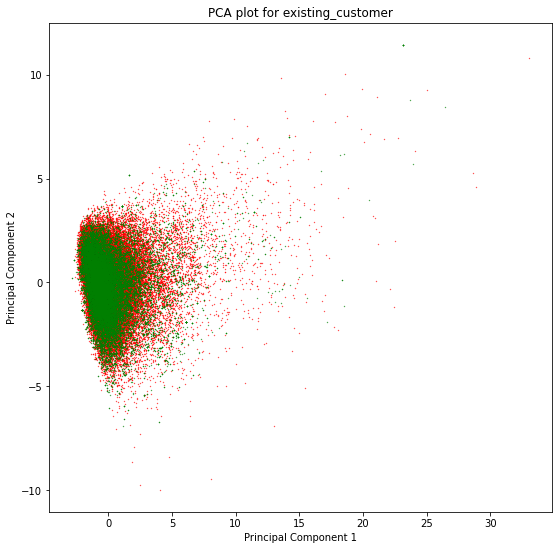

In [67]:
#Plotting Scatter plot
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA plot for existing_customer')

existing_customer = [0,1]
colors = ['r','g']
for existing_customer, color in zip(existing_customer,colors):
    index = ndf['existing_customer'] == existing_customer
    ax.scatter(ndf.loc[index, 'PC1'], ndf.loc[index, 'PC2'], c = color, s = 0.1)

plt.show()